# Deep Learning mit TensorFlow: Ein Einstieg am Beispiel des MNIST-Datensatzes

In diesem Notebook erstellen und trainieren wir ein neuronales Netzwerk mit TensorFlow. Wir verwenden den MNIST-Datensatz, eine Sammlung von handgeschriebenen Ziffern, die als Basisdatensatz für zahlreiche Einführungen in das maschinelle Lernen dient. 
Mit TensorFlow, einer Python-Bibliothek, lassen sich mit realtiv geringen Aufwand komplexe Modelle entwickeln.


Wir erstellen ein eigenes Modell, trainieren es mit dem MNIST-Datensatz und bewerten seine Leistung. Ziel ist es, ein Modell zu erstellen, das diese Ziffern mit hoher Genauigkeit erkennen kann. Wir beginnen mit einem einfachen Modell und dann kann mit verschiedenen Hyperparamtern experimentiert werden, um die Modellleistung zu verbessern.


In [27]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import tensorflow as tf 

# Set the seed for random number generation
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
tf.random.set_seed(42) 



In [28]:
# load MNIST data and create train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the training dataset
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (60000, 28, 28)
Test: (10000, 28, 28)


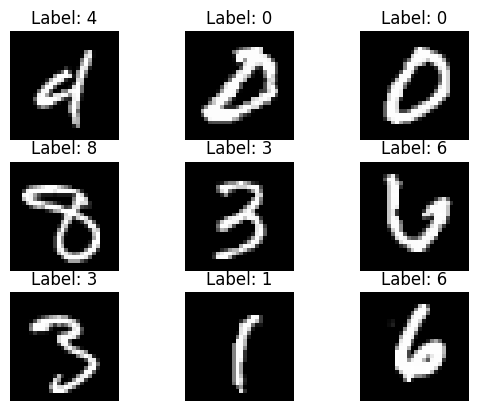

In [29]:
j = 1

# Set the seed for NumPy's random number generator to ensure reproducibility.
# This guarantees that the script, when run by anyone at any time, 
# will produce the same random choices for images and other random elements,
# making the results consistent with those presented.
np.random.seed(42)
for i in np.random.choice(np.arange(0, len(y_train)), size=9):
    img = X_train[i]  # Extract the image
    plt.subplot(3, 3, j)  # Plot in a 3x3 grid
    j += 1
    plt.axis('off')  # Hide the axis
    plt.imshow(img, cmap='gray', interpolation='None')  # Show image in grayscale
    plt.title('Label: ' + str(y_train[i]))  # Show the label of the image

In [30]:

# Normalize the pixel values by dividing by the maximum value (255)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Perform one-hot encoding to convert labels into categorical vectors
nb_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=nb_classes)
y_test = to_categorical(y_test, num_classes=nb_classes)

In [31]:
# Define the model layers
first_hidden = Dense(units=20, activation='relu')  # First hidden layer with ReLU activation
second_hidden = Dense(units=14, activation='relu')  # Second hidden layer with ReLU activation
output_layer = Dense(units=nb_classes, activation="softmax")  # Output layer with Softmax activation

# Construct the model
model = Sequential([
    Input(shape=(28, 28)),  # Input layer with shape 28x28
    Flatten(),  # Flatten the input data
    first_hidden,  # Add first hidden layer
    second_hidden,  # Add second hidden layer
    output_layer  # Add output layer
])

In [32]:
# Compile the model with loss and metrics
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model on test data
model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7780 - loss: 0.7219
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9299 - loss: 0.2424
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9424 - loss: 0.1986
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9500 - loss: 0.1758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9546 - loss: 0.1598
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9364 - loss: 0.2163


[0.17683222889900208, 0.948199987411499]

In [33]:
# Train the model and save the training history
history = model.fit(X_train, y_train, batch_size=200, epochs=20, validation_split=0.2)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9588 - loss: 0.1398 - val_accuracy: 0.9651 - val_loss: 0.1255
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9612 - loss: 0.1289 - val_accuracy: 0.9642 - val_loss: 0.1263
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9634 - loss: 0.1231 - val_accuracy: 0.9641 - val_loss: 0.1272
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9648 - loss: 0.1184 - val_accuracy: 0.9641 - val_loss: 0.1281
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9666 - loss: 0.1143 - val_accuracy: 0.9637 - val_loss: 0.1284
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9685 - loss: 0.1107 - val_accuracy: 0.9635 - val_loss: 0.1291
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9693 - loss: 0.1076 - val_accuracy: 0.9628 - val_loss: 0.1299
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9704 - loss: 0.1046 - val_accuracy: 0.

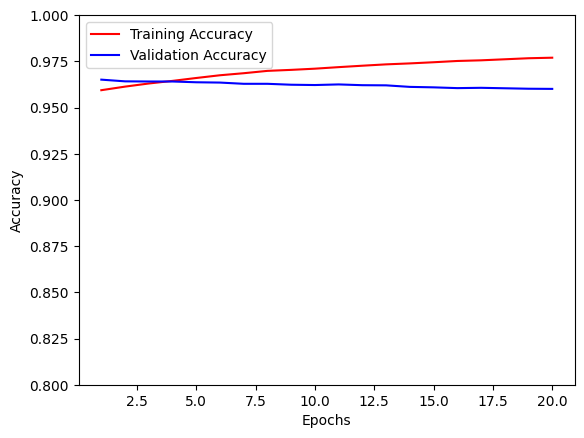

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1818
Loss Function: 0.15
Accuracy: 0.96


In [34]:
# Plot training and validation accuracy
plt.plot(range(1, 21), history.history["accuracy"], label="Training Accuracy", color="red")
plt.plot(range(1, 21), history.history["val_accuracy"], label="Validation Accuracy", color="blue")
ax = plt.gca()
ax.set_ylim([0.8, 1])  # Set the y-axis limits
plt.xlabel("Epochs")  # Label the x-axis
plt.ylabel("Accuracy")  # Label the y-axis
plt.legend()  # Show the legend
plt.show()  # Display the plot

# Evaluate the model on test data and print loss and accuracy
score = model.evaluate(X_test, y_test)
print("Loss Function: {:.2f}".format(score[0]))  # Loss function result
print("Accuracy: {:.2f}".format(score[1]))       # Accuracy result


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


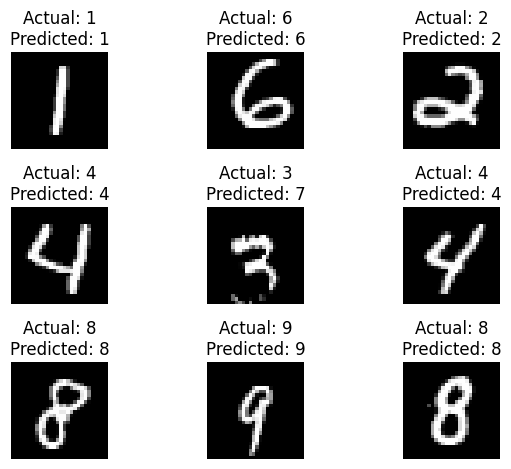

In [35]:
# run the cell
# Predictions for the test dataset
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

np.random.seed(42)
# randomly choose pictures and show actual and predicted labels
indices = np.random.choice(range(len(actual_labels)), size=9)
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(X_test[idx], cmap='gray', interpolation='None')
    plt.title(f'Actual: {actual_labels[idx]}\nPredicted: {predicted_labels[idx]}')
plt.tight_layout()
#fig.patch.set_facecolor('black') 
plt.show()

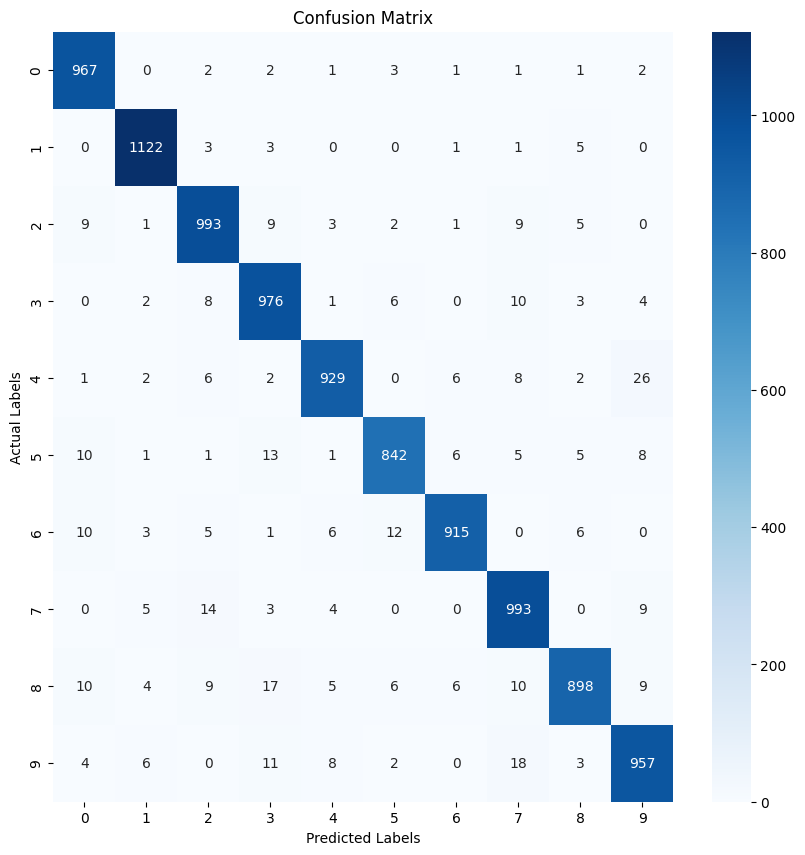

In [36]:
# confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# plot confusion matrix
plt.figure(figsize=(10, 10))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [37]:
sum_diagonal = np.sum(np.diagonal(cm))

print(sum_diagonal)

9592


## Aufgaben:
Um das Gelernte zu vertiefen und ein besseres Verständnis für die Anpassungsmöglichkeiten neuronaler Netze zu bekommen, probiere folgende Übungen aus:  

**Ändere Units:** Experimentiere mit den Einheiten in den versteckten Schichten (`first_hidden`, `second_hidden`): Ändere die Anzahl der Units in den vorhandenen versteckten Schichten. Starte mit einer kleinen Anzahl von Einheiten (z.B. 10) und erhöhe sie schrittweise (z.B. auf 100). Beobachte, wie sich die Veränderungen auf die Genauigkeit und den Verlust des Modells auswirken.  

**Füge ein drittes verstecktes Layer hinzu:** Erweitere dein Modell um eine zusätzliche versteckte Schicht und experimentiere mit unterschiedlichen Anzahlen von Units. Untersuche, ob das Hinzufügen einer weiteren Schicht die Modellleistung verbessert oder verschlechtert.  

Die Übungen helfen zu verstehem, wie verschiedene Modellarchitekturen und -parameter die Leistung deines neuronalen Netzwerks beeinflussen. Dokumentiere deine Beobachtungen und Schlussfolgerungen.   

**Viel Spaß beim experimentieren.**
